## Netflix_EDA_Project

Questions:

1.What's the trend of the number of contents published by Netflix? (Is there a increase?)

2.Which country/region has the largest number of contents?

3.What's the ratio of movies to TV series? Any change in the trend?

4.What are the most popular genres?

5.In which months does Netflix publish the largest number of new contents? Is there a holiday peak?

6.What's the distribution of the length of contents? (Short or long ?)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# 0.pre-preparation
# Dataset Information
df.info()
print('\nMissing values:\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
des

In [4]:
# check duplicates
dup = df.duplicated()
df[dup]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [5]:
# date conversion & extraction
df['date'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
# format = the format of initial data
# errors='coerce' --> when cannot extract, no error but fillin NaT (Not a Time)
df['year'] = df['date'].dt.year.astype('Int64')
df['month'] = df['date'].dt.month.astype('Int64')
#.dt.year: datetime accessor, extract information from datetime
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  date          8797 non-null   datetime64[ns]
 13  year          8797 non-null   Int64         
 14  month         8797 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int64(

# 1.What's the trend of the number of contents published by Netflix?


1.   Has the number of Netflix contents increased over the years?
2.   Which years were the most active?
3.   Was there any change during the COVID-19 pandemic(2020)?

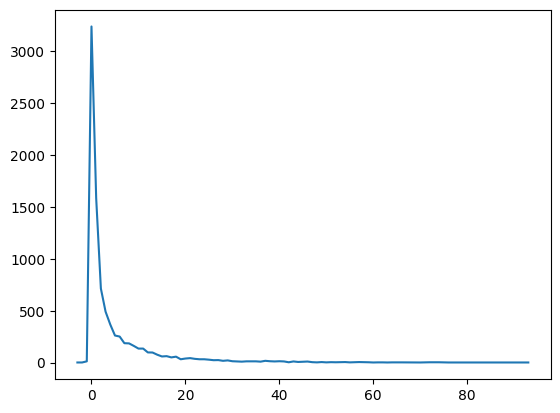

In [7]:
# Q1 Clean the data
# notice some null value in year, check if it's reasonable to use release_year to replace null
valid = df.dropna(subset=['year','release_year'])
diff = (valid['year'] - valid['release_year']).value_counts().sort_index()
plt.plot(diff);

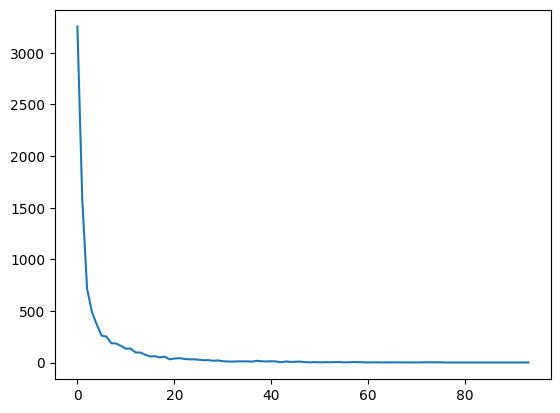

In [8]:
# some negative diff, it's impossible to release a content before it first released
# correct all year earlier than release_year to release_year
df.loc[df['year']<df['release_year'],'year'] = df['release_year']
valid = df.dropna(subset=['year','release_year'])
diff = (valid['year'] - valid['release_year']).value_counts().sort_index()
plt.plot(diff);

In [9]:
diff

,count
0,3255
1,1585
2,714
3,491
4,367
...,...
73,3
74,3
75,2
76,1


In [10]:
# from the simple analysis, we can see most of the year are within 0-1 year after release_year
# so we can fill the null year values (and release_year exists) with release_year
df.loc[df['year'].isna() & df['release_year'].notna(),'year'] = df['release_year']
assert df['year'].isna().sum() == 0

In [11]:
# Q1 Start analyzing
yearly_counts = df.value_counts('year').sort_index()
yearly_counts

,count
year,
2003,2
2008,3
2009,2
2010,2
2011,13
2012,4
2013,11
2014,24
2015,84


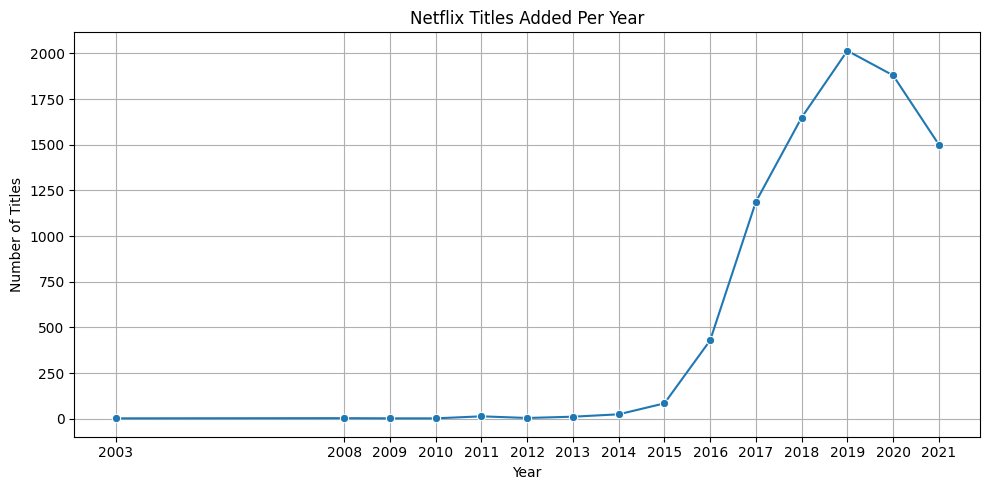

In [12]:
# Q1 Visualization
yearly_counts.index = yearly_counts.index.astype(int)
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index,y=yearly_counts.values,marker='o')
plt.xticks(yearly_counts.index)
plt.title('Netflix Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout();

# Answer to Q1

1.Has the number of Netflix contents increased over the years?



*   Yes, the number of titles added to Netflix shows a clear upward trend from around 2014 to 2019. Even though this trend declined after 2019, the sharp increase during 2008 - 2019 reflects Netflix's remarkable expansion.


2.Which years were the most active?



*   2019 and 2020 were the peak years with the highest number of new titles added. This pattern may suggest a strategic effort by Netflix to increase its content library before the global pandemic hit in 2020.



3.Was there any change during the COVID-19 pandemic(2020)?



*   Yes. In 2020, there is a noticeable declinee in the number of new titles added compared to 2019. This could be attributed to the COVID-19 pandemic, ehich disrupted global filming schedules, production pipelines, and international releases.


# **Interpretation Summary**

The dataset generlly reveals a rapid growth in Netflix content additions leading up to 2019, with a possible strategic expansion pause.

The sudden drop in 2020 may align with the timeline of the COVID-19 pandemic, suggesting external disruptions in the content production pipeline.

# 2.Which country/region has the largest number of contents?


1.   Which country/region has the largest number of contents?
2.   Whether there is a regional concentration of contents (eg. Is the U.S. far ahead)?


In [13]:
# Q2 Clean the data
df.loc[df['country'].isna(),'year'].value_counts()
#df['country'].value_counts(dropna=True)

,count
year,
2021,358
2019,158
2018,119
2020,108
2017,65
2016,19
2015,3
2010,1


In [14]:
# drop null values
df_country = df.dropna(subset=['country'])

In [15]:
# cope with multiple countries
# make the one data point a list, with multiple country names in it
df_country_split = df_country.assign(country=df_country['country'].str.split(','))
# explode the list to multiple rows
df_country_exploded = df_country_split.explode('country')
df_country_exploded['country'] =  df_country_exploded['country'].str.strip()

df_country_exploded[['title','country']]

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
4,Kota Factory,India
7,Sankofa,United States
7,Sankofa,Ghana
...,...,...
8801,Zinzana,Jordan
8802,Zodiac,United States
8804,Zombieland,United States
8805,Zoom,United States


In [16]:
# Q2 Start analyzing
country_counts = df_country_exploded['country'].value_counts()
country_top10 = country_counts.head(10).reset_index()
country_top10.columns = ['country','count']

country_top10

,country,count
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


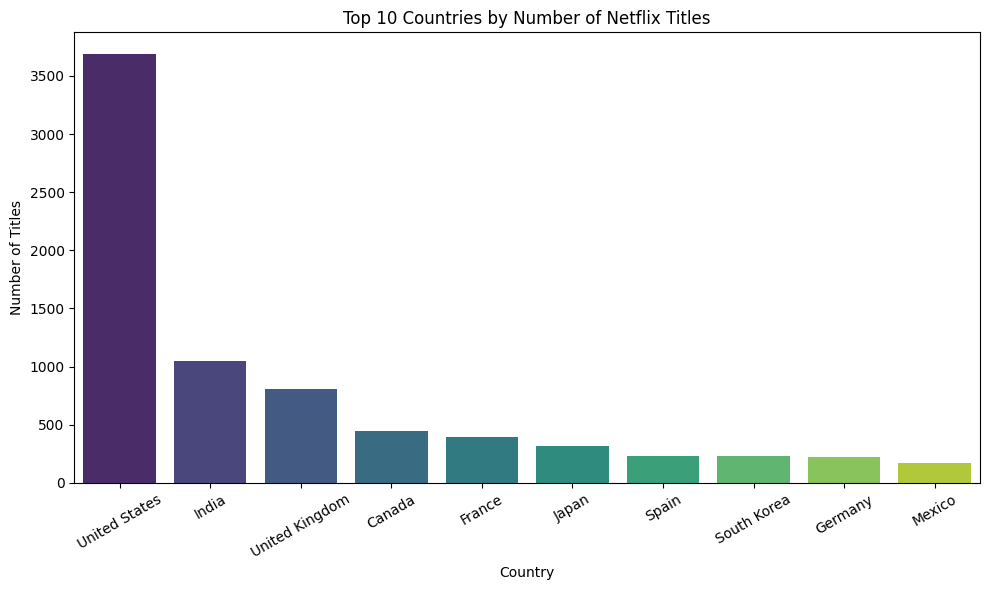

In [17]:
# Q2 Visualization
plt.figure(figsize=(10,6))
sns.barplot(data = country_top10,
            x='country',
            y='count',
            hue='country',
            palette='viridis')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=30)
plt.tight_layout();

# Answer to Q2

After Processing the dataset and splitting multi_country entries, we found that:



*   The United States has by far the most content on Netflix, with over 3,500 titles
*   Other countries with large number of titles include India, United Kingdom, Canada, France, etc.

#**Interpretation Summary**

This distribution reflects Netflix's strong presence in English-speaking  markets and in major media-producing countries. The dominance of the U.S. may also stem from its large entertainment industry and the platform's origin as a U.S.-based company.

India's high count suuggests a focus on the growing South Asian market and the popularity of Bollywood productions. The United Kingdom and Canada also have active film industries and long-standing distribution relationships with Netflix.



# 3.What's the ratio of Movies to TV Shows? Any change in the trend?


1.   What's the overall ratio of Movies to TV Shows?
2.   Has the ratio changed over time?
3.   What does the year-by-year data show?


In [18]:
# Q3 Clean data
df['type'].describe()
# no mising value, no unmatching value, no action needed

,type
count,8807
unique,2
top,Movie
freq,6131


In [19]:
# Q3 Start analyzing
# overall ratio
type_counts = df['type'].value_counts()

type_counts

,count
type,
Movie,6131
TV Show,2676


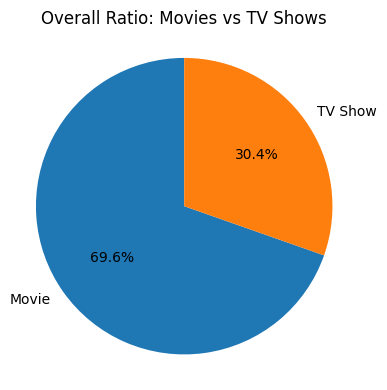

In [20]:
# Q3 Visualization1
plt.figure(figsize=(4,4))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4','#ff7f0e']
)
plt.title('Overall Ratio: Movies vs TV Shows')
plt.axis('equal')
plt.tight_layout();

In [21]:
# yearly trend
# already cleaned the dataset  in Q1
df[df['year'].notna()]['type'].describe()

,type
count,8807
unique,2
top,Movie
freq,6131


In [22]:
# count by year
type_trend = df.groupby(['year','type']).size().unstack(fill_value=0)

# calculate the TV/Movie ratio
type_ratio = type_trend['TV Show'] / type_trend['Movie']

# number of titles over years for each type in table
type_table = type_trend
type_table.columns.name = None
type_table = type_trend.rename(columns={'TV Show':'TV Show count','Movie':'Movie Count'})

type_table

,Movie Count,TV Show count
year,,
2003,0,2
2008,1,2
2009,2,0
2010,1,1
2011,13,0
2012,3,1
2013,6,5
2014,19,5
2015,56,28


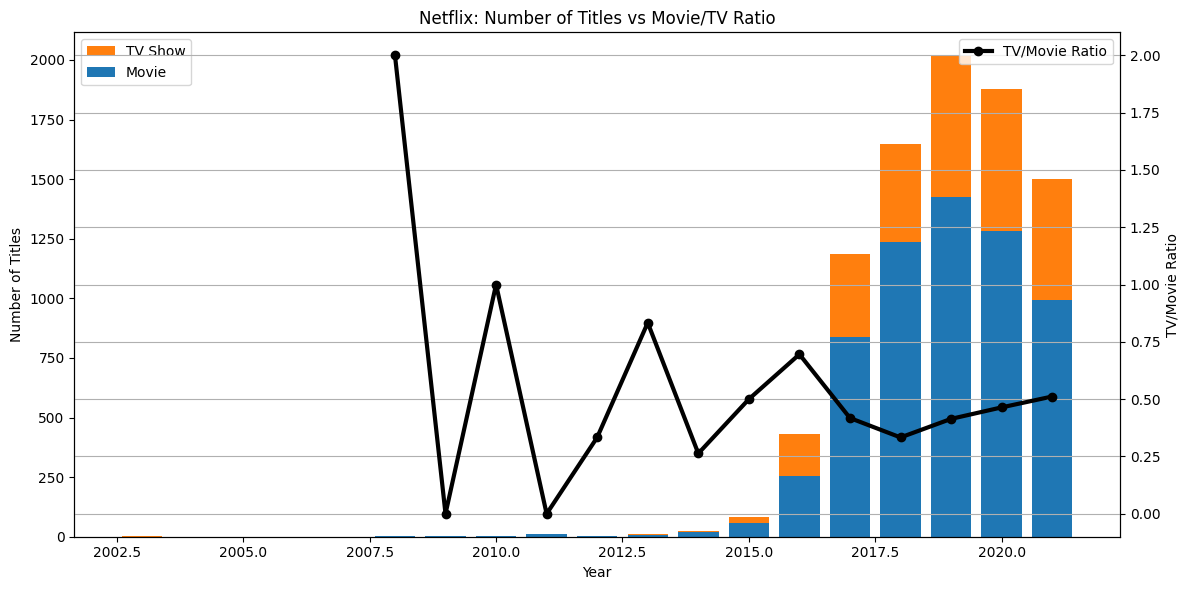

In [23]:
#Q3 Visualization2
fig, ax1 = plt.subplots(figsize=(12,6))

# left axis: stacked columns
ax1.bar(type_trend.index, type_trend['Movie'], label='Movie',color='#1f77b4')
ax1.bar(type_trend.index, type_trend['TV Show'], bottom=type_trend['Movie'], label='TV Show', color='#ff7f0e')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Titles')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend([handles[1],handles[0]],[labels[1],labels[0]],loc='upper left')

# right axis: line plot of TV Show/Movie
ax2 = ax1.twinx()
ax2.plot(type_trend.index, type_ratio, color='k', marker='o', linestyle='-', linewidth=3, label='TV/Movie Ratio')
ax2.set_ylabel('TV/Movie Ratio')
ax2.legend(loc='upper right')

plt.title('Netflix: Number of Titles vs Movie/TV Ratio')
plt.grid(True)
plt.tight_layout();

# Answer to Q3

1.What's the overall ratio of Movies to TV Shows?



*   In total, Movies make up about 69.6%of all titles on Netflix, while TV Shows account for 30.4%.
*   Generally, the number of movies is over double the number od TV Shows. This confirms that Movies have been the dominant content type on the platform.


2.Has the ratio changed over time?



*   Yes -- while Movies have always outnumbered TV Shows, the TV Show share has been gradually increasing, especially after 2018.

*   Between 2015 and 2018, the ratio fluctuated due to spikes in movies releases. Since 2018, the share of TV Shows has risen steadily, reflecting a slow but consistent shift.


3.What does the year-by-year data show?



*   From 2016 to 2019, both Movies and TV Shows grew rapidly, with Movies peaking in 2019 at over 1300 titles. TV Shows also expanded, from about 120 in 2016 to nearly 600 by 2020.

*   From 2009 to 2022, the number of TV Shows has remained consistenly lower than Movies, but the share of TV Shows also shows a steady increase over the years.


# **Interpretation Summary**

Netflix's content catalog has long been movie-dominated, but recent data reveals a progressive shift toward more TV content. After 2018, the share of TV Shows began to rise steadily, reflecting Netflix's growing investment in episodic content and original series.

The fluctuation seen in earlier years are likely due to the limited number of total titles and the less structured content acquisition strategy before Netflix's global expansion gained momentum.

# 4.What are the most popular genres?


1.   What are the top 10 most common genres overall?
2.   Are there differences in genre popularity between Movies and TV Shows?
3.   How have the top genres changed over time?


In [24]:
# Q4 clean the data
# cope with multiple tags in 'listed_in'

df_genre_split = df.assign(listed_in=df['listed_in'].str.split(','))
df_genre_exploded = df_genre_split.explode('listed_in')
df_genre_exploded['listed_in'] = df_genre_exploded['listed_in'].str.strip()

df_genre_exploded[['title','type','listed_in']]

,title,type,listed_in
0,Dick Johnson Is Dead,Movie,Documentaries
1,Blood & Water,TV Show,International TV Shows
1,Blood & Water,TV Show,TV Dramas
1,Blood & Water,TV Show,TV Mysteries
2,Ganglands,TV Show,Crime TV Shows
...,...,...,...
8805,Zoom,Movie,Children & Family Movies
8805,Zoom,Movie,Comedies
8806,Zubaan,Movie,Dramas
8806,Zubaan,Movie,International Movies


In [25]:
# clean and transform the data (get real genres)
genre_mapping={
    #'International Movies':'International',
    #'International TV Shows':'International',
    'Children & Family Movies':'Children & Family',
    'Anime Series':'Anime',
    'Anime Movies':'Anime',
    'TV Dramas':'Dramas',
    'TV Comedies':'Comedies',
    'TV Sci-Fi & Fantasy':'Sci-Fi & Fantasy',
    'TV Action & Adventure':'Action & Adventure',
    'TV Horror':'Horror',
    'TV Mysteries':'Mysteries',
    'Romantic Movies':'Romance',
    'Romantic TV Shows':'Romance',
    'Crime TV Shows': 'Crime',
    'Anime TV':'Anime',
    'Anime TV Shows':'Anime',
    "Kids' TV": 'Children & Family',
    'Docuseries':'Documentaries',
    'Stand-Up Comedy':'Stand-Up Comedy & Talk Shows',
    'Stand-Up Comedy & Talk Shows':'Stand-Up Comedy & Talk Shows',
    'Horror Movies':'Horror',
    #'British TV Shows': 'International',
    'Reality TV':'Reality Shows',
    'Sports Movies': 'Sports',
    #'Spanish-Language TV Shows':'International',
    #'Korean TV Shows':'International',
    'LGBTQ Movies':'LGBTQ',
    'TV Mysteries':'Mystery',
    'Science & Nature TV':'Science & Nature',
    'Anime Action & Adventure':'Anime',
    'Anime Sci-Fi & Fantasy':'Anime',
    'TV Thriller': 'Thriller',
    'Anime Feature': 'Anime',
    'Teen TV Shows':'Teen'
}
def clean_genre(g):
  return genre_mapping.get(g,'Others')
df_genre_exploded['clean_genre'] = df_genre_exploded['listed_in'].map(clean_genre)

df_genre_exploded[['title','type','clean_genre']]

# remove duplicaets
df_genre_cleaned = df_genre_exploded.drop_duplicates(subset=['title','type','clean_genre'])
df_genre_cleaned[['title','type','clean_genre']]

# count
genre_counts = df_genre_cleaned['clean_genre'].value_counts()
genre_counts

,count
clean_genre,
Others,7098
Children & Family,1092
Romance,986
Dramas,763
Comedies,581
Crime,470
Horror,432
Stand-Up Comedy & Talk Shows,399
Documentaries,395


In [26]:
genre_meaningful_counts = genre_counts.drop('Others').sum()
genre_meaningful_counts

np.int64(6381)

🔍 **Data Coverage Note: Genre Mapping Completeness**

Out of ~8800 total titles, our genre mapping process successfully categorized 6381 titles into defined genre groups.
The remaining ~2400 records (approximately 27% of the dataset) could not be categorized and were therefore excluded from the genre-based analysis.

These uncategorized records are due to two main reasons:

*    Missing listed_in tags – Some records did not provide any genre label at all.

*    Unconventional or ambiguous genre labels – These included vague or non-informative tags such as 'International', 'Cult', 'British TV', or 'Stand-Up', which could not be mapped to a clear genre group.

⚠️ This means that roughly 1 out of 4 records lacks usable genre information, which may slightly skew the final genre distribution results. For example, genres that tend to be labeled with ambiguous tags (e.g., international documentaries or hybrid shows) might be underrepresented in the analysis.

This limitation reflects typical data quality challenges encountered in real-world datasets and should be clearly acknowledged when interpreting genre trends or making business recommendations.

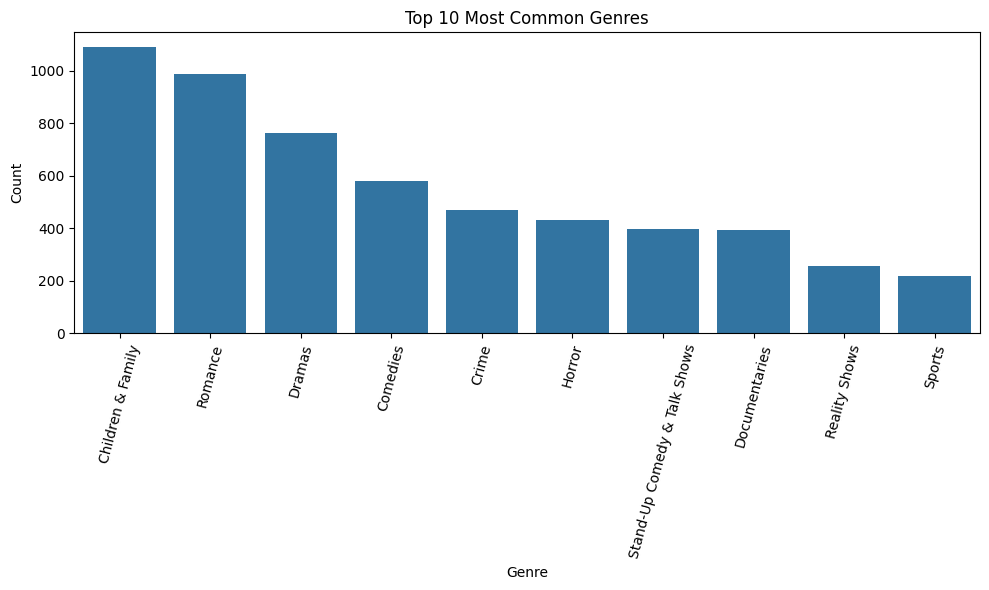

In [27]:
# get the top 10 most common genres
genre_top10 = genre_counts.drop('Others',errors='ignore').head(10).reset_index()
genre_top10.columns = ['genre','count']
genre_top10

# Q4 Visualization1
plt.figure(figsize=(10,6))
sns.barplot(x=genre_top10['genre'],
            y=genre_top10['count'])
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout();

In [28]:
# difference between TV Show and Movies in all genres
genre_by_types = df_genre_cleaned.groupby(['clean_genre','type']).size().unstack()
genre_by_types.columns = ['Movie','TV Show']
genre_by_types

,Movie,TV Show
clean_genre,,
Action & Adventure,NaN,168.0
Anime,NaN,176.0
Children & Family,641.0,451.0
Comedies,NaN,581.0
Crime,NaN,470.0
Documentaries,NaN,395.0
Dramas,NaN,763.0
Horror,357.0,75.0
LGBTQ,102.0,NaN


In [29]:
# use the top10 subset and analyze the difference in TV Shows and Movies
top_genre_names = genre_top10['genre'].tolist()
genre_by_types_top10 = genre_by_types.loc[top_genre_names]
genre_by_types_top10

,Movie,TV Show
clean_genre,,
Children & Family,641.0,451.0
Romance,616.0,370.0
Dramas,NaN,763.0
Comedies,NaN,581.0
Crime,NaN,470.0
Horror,357.0,75.0
Stand-Up Comedy & Talk Shows,343.0,56.0
Documentaries,NaN,395.0
Reality Shows,NaN,255.0


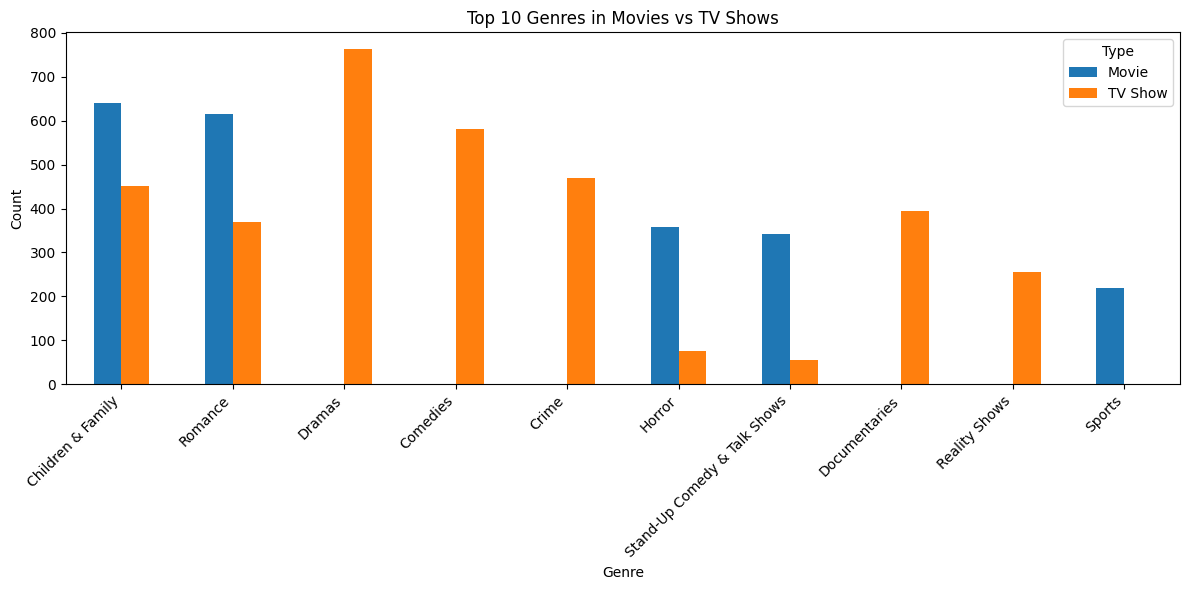

In [30]:
# Q4 Visualization2
genre_by_types_top10.plot(kind='bar',figsize=(12,6))
plt.title('Top 10 Genres in Movies vs TV Shows')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=45,ha='right')
plt.legend(title='Type')
plt.tight_layout();

In [31]:
# the changes of top5 genres over years
genre_by_years = df_genre_cleaned[['title','year','clean_genre']].groupby(['clean_genre','year']).size().unstack()
#genre_by_years = genre_by_years[df_genre_cleaned['clean_genre']!='Others']
top5_genre_names = top_genre_names[:5]
genre_by_years = genre_by_years.loc[top5_genre_names, 2014:]

🔍 **Note: Scope of Genre Trend Visualization**

This chart focuses only on the **top 5 most common genres** to avoid visual clutter caused by too many genre types and overlapping colors.

It also limits the timeline to **2014 onward**, since earlier years (2003–2013) have very sparse data and may distort trend patterns. This is also consistent with the data distribution shown in Question 1.


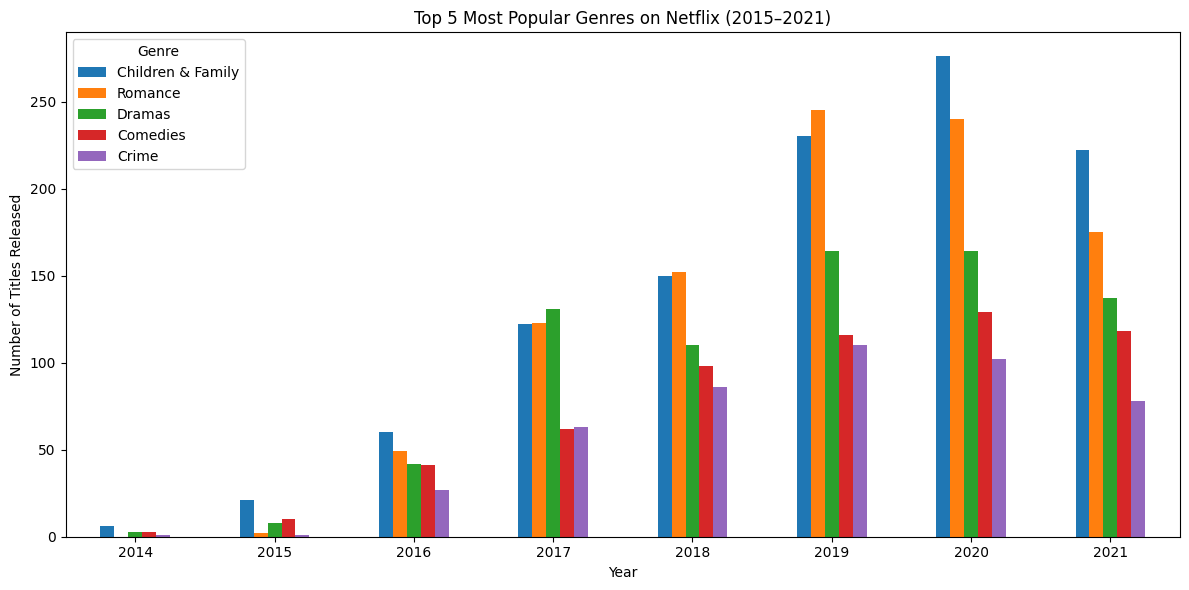

In [32]:
#colors = sns.color_palette('tab10')
genre_by_years.T.plot(kind='bar',figsize=(12,6))
plt.title("Top 5 Most Popular Genres on Netflix (2015–2021)")
plt.ylabel('Number of Titles Released')
plt.xlabel('Year')
plt.xticks(rotation=0,ha='center')
plt.legend(title='Genre')

plt.tight_layout();

# Answer to Q4

1.What are the top 10 most common genres overall?



*   Generally, **Children & Family**, **Romance**, **Dramas**, **Comedies**, **Crime**, **Horror**, **Stand-Up Comedy & Talk Shows**, **Documentaries**, **Reality Shows** and **Sports** are the top 10 most popular genre.
*   **Children & Family**, **Romance** and **Dramas** amounted to 1092, 986 and 763  titles respectively. This suggests a strong focus on family-friendly, emotional, and genre-diverse content across the platform.


2.Are there differences in genre popularity between Movies and TV Shows?



*   Yes -- there are notable distinctions. Typically, among the top 10 most popular genres, **Dramas, Comedies, Crime, Documentaries and Reality Shows are only found in TV Shows**. Meanwhile **Children & Family, Romance, Horror, Stand-Up Comedy & Talk Shows and Sports are predominantly in Movies**.

*   Even though the number of **TV Shows** is generally smaller than the number of Movies, they **span a wider range of genres** (9 out of the top 10) most popular genres, suggesting that **TV Shows serve more diverse audience interests**, where as **Movies tend to focus on mainstream categories** like family and romance.


3.How have the top genres changed over time.



*   We examined trends in the top 5 genres from 2014 to 2021, excluding earlier years due to insufficient data volume. Generally, all top 5 genres experience strong growth from 2014 to 2020, peaking in 2020.

*   **Romance briefly surpassed Children & Family in 2018 and 2019**, but returned to second place afterward.

*    In **2017, Dramas became the most released genre**, while **Crime also exceeded Comedies** in that year.

*   **The trend of all 5 genres is similar with the trend of Netflix added titles per year**, with a decline occured in 2021, possiblt due to production disruptions such as the COVID-19 pandemic.


# **Interpretation Summary**
The data indicates that while Movies remain the dominant content type on Netflix (and also the top 2 genres), TV Shows have carved out a wider genre footprint -- particularly in Drams, Comedies, Crime, etc.

Given the consistent popularity of genres like Children & Family, Romance, and Dramas, The temporary decline post-2020 may reflect external shocks rather than a swift in audience preference. In this point, Netflix may continue investing in these areas across both formats.

📌 Analytical Notes (Q4)

Among ~ 8800 titles, only 6381 were mapped to clear genres.
The remaining ~ 2400 (~ 27%) lacked valid listed_in tags or used ambiguous labels like "International", "Cult", and were excluded from genre-based analysis.

While analyzing genre by content type, I noticed that all “Sports” titles were Movies, with no Sports-related TV Shows — a pattern also seen in other genres like “Crime” and “Documentary”, which contradicts real-world content and suggests labeling limitations in the dataset. A manual check of the raw `listed_in` values confirmed this issue came from the original tags, not analyzing logic.


# 5.What's the monthly pattern of Netflix Content Releases?


1.   What is the overall monthly distribution of new content releases on Netflix?
2.   Are there differences in monthly release patterns between Movies and TV Shows?
3.   Is there a content release peak around global holidays? Do monthly release patterns shift over years?



In [33]:
# Q5 clean the data
df['month'].isna().sum()

np.int64(10)

In [34]:
df5 = df.dropna(subset=['month'])

In [35]:
# Q5 overall pattern
monthly_count = df5['month'].value_counts().sort_index().reset_index()
monthly_count.columns = ['month','new content releases']
#monthly_count.sort_values('new content releases',ascending=False)
monthly_count

,month,new content releases
0,1,738
1,2,563
2,3,742
3,4,764
4,5,632
5,6,728
6,7,827
7,8,755
8,9,770
9,10,760


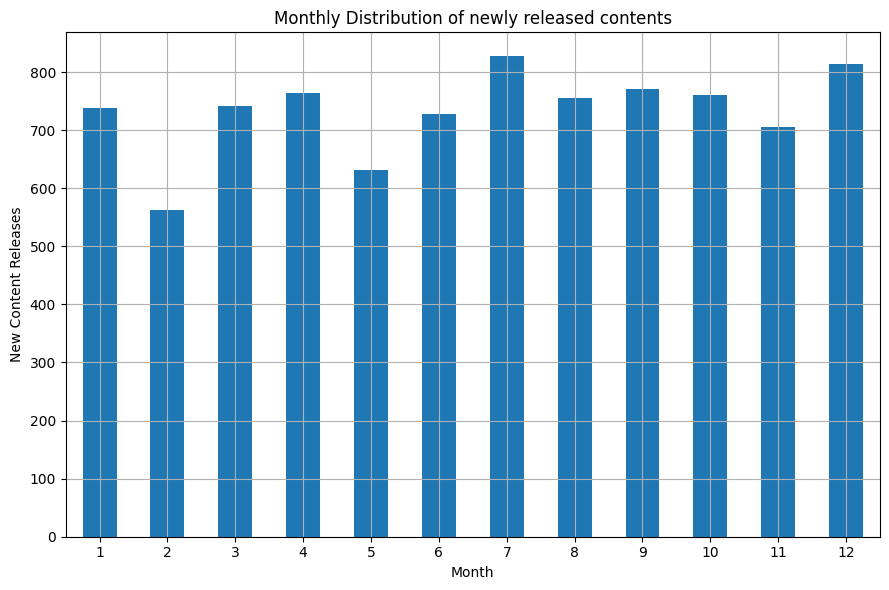

In [36]:
# Q5 Visualization1
monthly_count.plot(kind='bar',x='month',y='new content releases',figsize=(9,6))
plt.title('Monthly Distribution of newly released contents')
plt.xlabel('Month')
plt.ylabel('New Content Releases')
plt.legend().set_visible(False)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout();

In [37]:
# difference in content release patterns between TV Shows and Movies?
# df['type'].isna().sum()
df5[['month','type']].isna().sum()

,0
month,0
type,0


In [38]:
monthly_type = df5.groupby(['month','type']).size().unstack()
type_ratio = monthly_type['TV Show']/monthly_type['Movie']

display(monthly_type)
display(type_ratio)

type,Movie,TV Show
month,,
1,546,192
2,382,181
3,529,213
4,550,214
5,439,193
6,492,236
7,565,262
8,519,236
9,519,251


,0
month,
1,0.351648
2,0.473822
3,0.402647
4,0.389091
5,0.439636
6,0.479675
7,0.463717
8,0.454721
9,0.483622


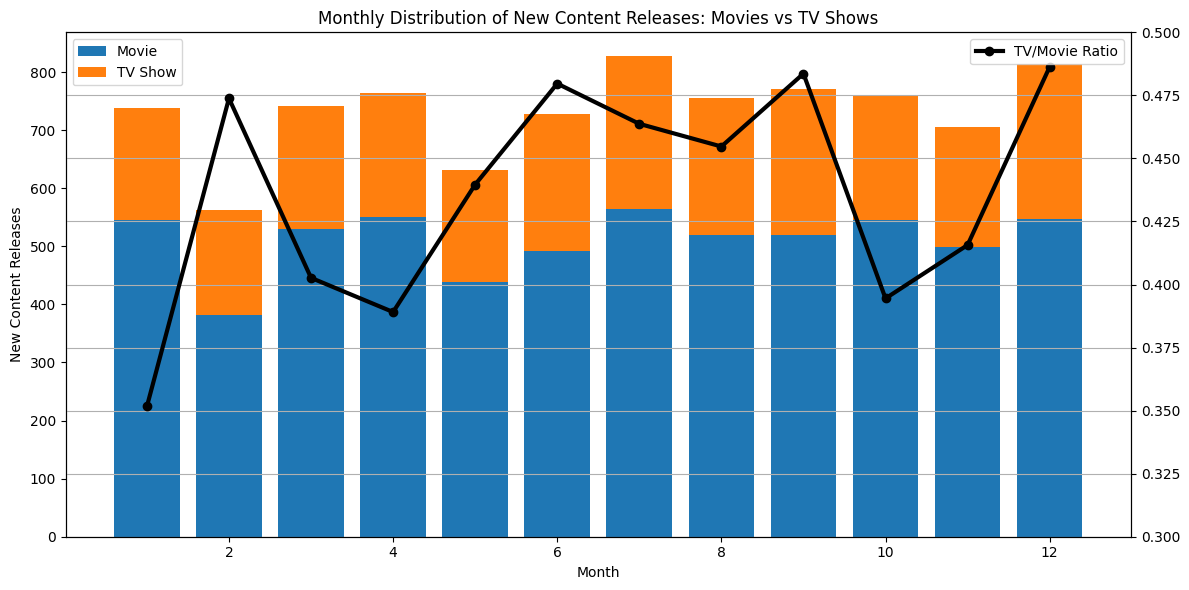

In [39]:
# Q5 Visualizatin2
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(monthly_type.index,
       monthly_type['Movie'],label='Movie')
ax.bar(monthly_type.index,
       monthly_type['TV Show'],bottom=monthly_type['Movie'],label='TV Show')
ax.set_xlabel('Month')
ax.set_ylabel('New Content Releases')
ax.legend()

ax2 = ax.twinx()
ax2.plot(monthly_type.index,type_ratio,color='k',
         marker='o',linestyle='-',linewidth=3,
         label='TV/Movie Ratio')
ax2.legend(loc='upper right')
ax2.set_ylim(0.3,0.5)


ax.set_title('Monthly Distribution of New Content Releases: Movies vs TV Shows')
plt.grid(True)
plt.tight_layout();

In [40]:
# holiday content release peak?

# count by year and month
year_monthly_counts = df5.groupby(['year','month']).size().unstack(fill_value=0)
year_monthly_counts

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2008,1,1,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,1,0,0,0,0,0,1,0
2010,0,0,0,0,0,0,0,0,0,0,1,0
2011,0,0,0,0,1,0,0,0,1,11,0,0
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,0,0,0,0,0,1,2,3,2,2
2014,2,2,0,2,0,1,1,1,1,4,4,6
2015,1,4,5,5,6,6,7,2,7,14,4,21
2016,43,15,18,22,13,18,28,34,48,51,44,94


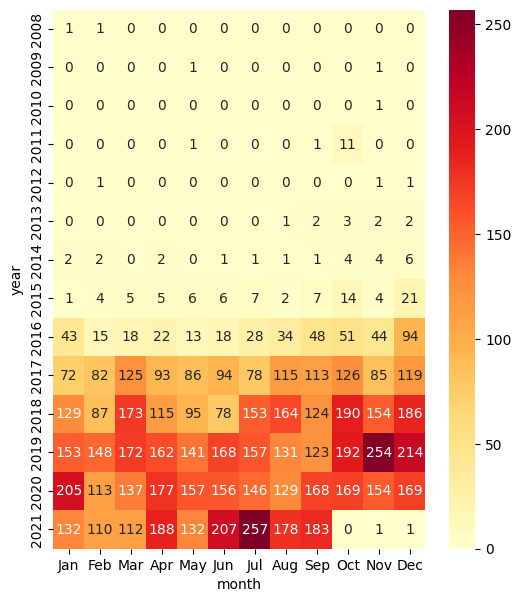

In [41]:
# Q5 Visualization3
plt.figure(figsize=(6,7))
ax = sns.heatmap(year_monthly_counts,cmap='YlOrRd',annot=True,fmt='d')

month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_labels,rotation=0);

# Answer to Q5

1.What is the overall monthly distribution of new content releases on Netflix?

*   Generally speaking, **July has the largest** number of new content releases with over 800 releases in total. Aside from February, May, November, which content releases are under 700, the rest all have the number of new content releases over 720.
*   Overall, content releases on Netflix are **fairly evenly distributed** throughout the year. In general, **the second half of year** has more new content releases.

2.Are there differences in monthly release patterns between Movies and TV Shows?

*   Yes -- there are notable distinctions. Generally, in every month's new content releases, **the number of Movies exceeds double the number of newly releases TV Shows**. The TV/Movie ratio is around 32.5% to 47.5%.

*   This indicates that while Netflix heavily favors Movies in terms of volume, TV Shows are regularly oubished alongside them, without a storng seasonal bias.


3.Is there a content release peak around global holidays?Do monthly release patterns shift over years?


*   According to the heatmap plot, we can see **two peak time in summer and winter months**, relating to summer holiday and Thanksgiving & Christmas respectively.

*   This pattern is most visiblr from 2017-2020, July and December consistently show darker shades, indicating higher release counts.

*   **No sigificant pattern shifts** were observed. Netflix's monthly releases structure has **remained strategically consistent** over the years. The seasonal and dual-peaks -- summer and holiday season -- have appeared almost every year since 2017, reflecting a stable release strategy.

# **Interpretation Summary**
Netflix appears to follow a **dual-peak seasonal release** strategy, aligning with school breaks in summer (July & August) and winter holidays (November & December). However, the overall monthly distribution remains fairly **balanced**, supporting a long-term goal of **consistent content availability**. There is no clear evidence of a shift in strategy over time -- Netflix's approach seems to be both **stable and holiday-aware**.

While the number of TV Shows is always lower than Movies, they are released in tandem every month, indicating Netflix's commitment to maintaining a diverse type of contents.

# 6.What's the distribution of the length of contents? (Short or long ?)


1.   What is the overall distribution of content durations?
2.   Are there differences between Movies and TV Shows in terms of length?
3. Are there extreme outliers or short-form content (like under 30 min)?


In [42]:
# Q6 clean the data
df['duration'].isna().sum()

np.int64(3)

In [43]:
# check the records with missing duration
df[df['duration'].isna()]
# our missing values are in 'rating'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04,2017,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16,2016,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016-08-15,2016,8


In [44]:
df_6 = df.fillna({'duration':df['rating']})
df_6.iloc[[5541,5794,5813],:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04,2017,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16,2016,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...,2016-08-15,2016,8


In [45]:
assert df_6['duration'].isna().sum() == 0

In [46]:
# overall distributioon of content durations
duration_count = df_6.groupby(['type','duration']).size()

print(duration_count['TV Show'].sort_index())
print(duration_count['Movie'].sort_index())
# TV Show and Movie use different ways to measure duration

duration
1 Season      1793
10 Seasons       7
11 Seasons       2
12 Seasons       2
13 Seasons       3
15 Seasons       2
17 Seasons       1
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
dtype: int64
duration
10 min       1
100 min    108
101 min    116
102 min    122
103 min    114
          ... 
95 min     137
96 min     130
97 min     146
98 min     120
99 min     118
Length: 205, dtype: int64


In [47]:
# correct the index
TV_duration = duration_count['TV Show'].sort_index().reset_index()
TV_duration.columns = ['duration','count']
print(TV_duration)

      duration  count
0     1 Season   1793
1   10 Seasons      7
2   11 Seasons      2
3   12 Seasons      2
4   13 Seasons      3
5   15 Seasons      2
6   17 Seasons      1
7    2 Seasons    425
8    3 Seasons    199
9    4 Seasons     95
10   5 Seasons     65
11   6 Seasons     33
12   7 Seasons     23
13   8 Seasons     17
14   9 Seasons      9


In [48]:
# split the number and measure
duration_cleaned = []
for i in range(len(TV_duration)):
  d = TV_duration['duration'][i].split(' ')[0]
  duration_cleaned.append(d)
TV_duration['duration'] = duration_cleaned
TV_duration['measure'] = 'season'
TV_duration

,duration,count,measure
0,1,1793,season
1,10,7,season
2,11,2,season
3,12,2,season
4,13,3,season
5,15,2,season
6,17,1,season
7,2,425,season
8,3,199,season
9,4,95,season


In [49]:
TV_duration['duration'] = TV_duration['duration'].astype('Int64')
TV_duration = TV_duration.sort_values('duration')
TV_duration

,duration,count,measure
0,1,1793,season
7,2,425,season
8,3,199,season
9,4,95,season
10,5,65,season
11,6,33,season
12,7,23,season
13,8,17,season
14,9,9,season
1,10,7,season


In [50]:
TV_duration.index = TV_duration['duration']
TV_duration.drop('duration',axis=1,inplace=True)
TV_duration

,count,measure
duration,,
1,1793,season
2,425,season
3,199,season
4,95,season
5,65,season
6,33,season
7,23,season
8,17,season
9,9,season


In [51]:
assert TV_duration['count'].dtype == 'int64'

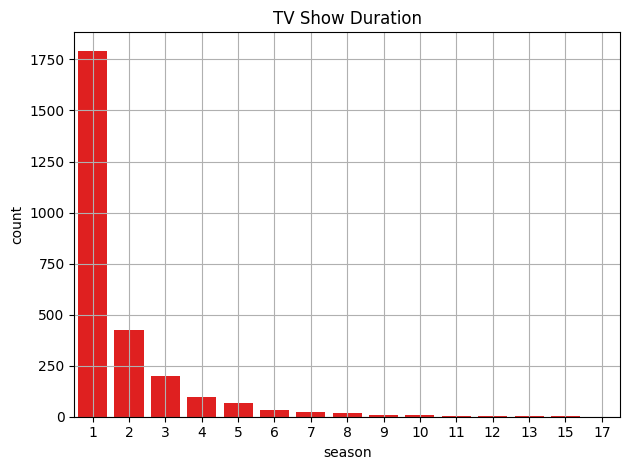

In [52]:
# Q6 Visualization1
sns.barplot(data=TV_duration,x=TV_duration.index,y='count',color='r',)
plt.xlabel('season')
plt.title('TV Show Duration')
plt.grid(True)
plt.tight_layout();

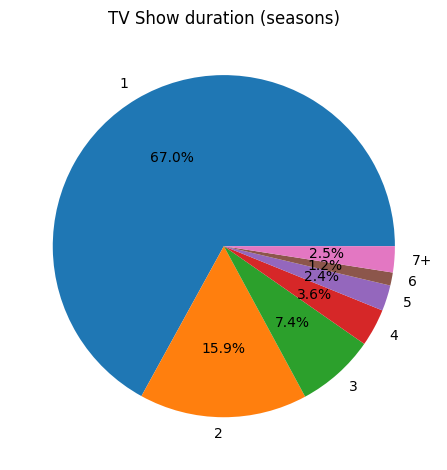

In [53]:
# Q6 Visualization2
# development: combine duration>=7 as one cat
TV_duration['group'] = TV_duration.index.map(lambda x: str(x) if x<7 else '7+')
TV_grouped = TV_duration.groupby('group')['count'].sum()
#plt.figure(figsize=(12,12))
plt.pie(TV_grouped,labels=TV_grouped.index,autopct='%1.1f%%')
plt.title('TV Show duration (seasons)')
plt.tight_layout();

In [54]:
TV_duration['count'].sum()

np.int64(2676)

In [55]:
Movie_duration = duration_count['Movie'].sort_index().reset_index()
Movie_duration.columns = ['duration','count']

In [56]:
Movie_duration

,duration,count
0,10 min,1
1,100 min,108
2,101 min,116
3,102 min,122
4,103 min,114
...,...,...
200,95 min,137
201,96 min,130
202,97 min,146
203,98 min,120


In [57]:
# split the number and measure
duration_cleaned = []
for i in range(len(Movie_duration)):
  d = Movie_duration['duration'][i].split(' ')[0]
  duration_cleaned.append(d)
Movie_duration['duration'] = duration_cleaned
Movie_duration['measure'] = 'min'
Movie_duration['duration'] = Movie_duration['duration'].astype('Int64')
Movie_duration.sort_values('duration')

,duration,count,measure
130,3,1,min
152,5,1,min
183,8,1,min
194,9,1,min
0,10,1,min
...,...,...,...
120,233,1,min
121,237,1,min
124,253,1,min
127,273,1,min


In [58]:
Movie_duration.index = Movie_duration['duration']
Movie_duration.drop('duration',axis=1,inplace=True)

In [59]:
Movie_duration = Movie_duration.sort_index()
Movie_duration.head(50)

,count,measure
duration,,
3,1,min
5,1,min
8,1,min
9,1,min
10,1,min
11,2,min
12,3,min
13,3,min
14,3,min


In [60]:
Movie_duration[Movie_duration['count'] == Movie_duration['count'].max()]

,count,measure
duration,,
90,152,min


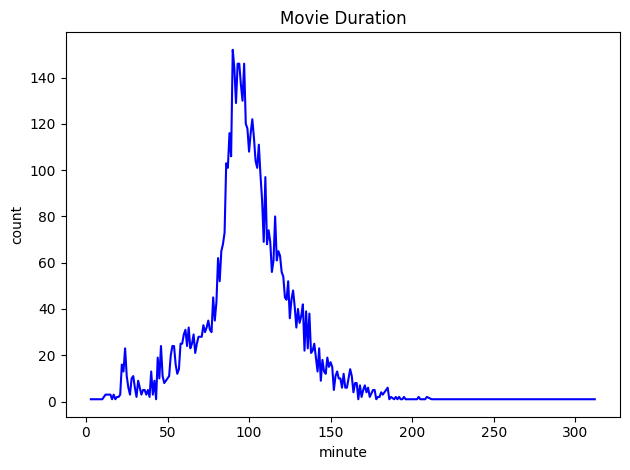

In [61]:
# Q6 Visualizatioon3
sns.lineplot(data=Movie_duration,x=Movie_duration.index,y='count',color='b')
plt.xlabel('minute')
plt.title('Movie Duration')
plt.tight_layout();

/tmp/ipython-input-69-2026093413.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(Movie_duration.groupby('range')['count'].sum(),


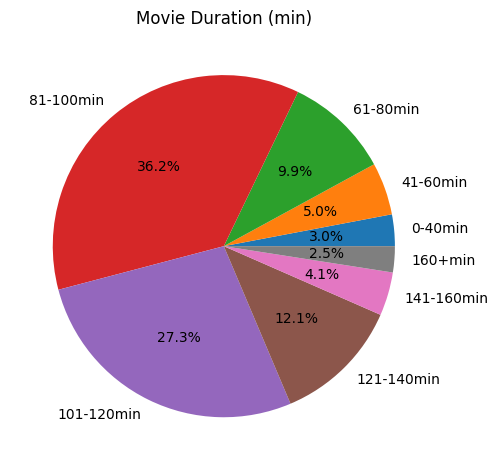

In [69]:
# Q6 Visualization4
label_ranges = [0,40,60,80,100,120,140,160,np.inf]
labels_names = ['0-40min','41-60min','61-80min','81-100min','101-120min',
                '121-140min','141-160min','160+min']
Movie_duration['range'] = pd.cut(Movie_duration.index,
                                  bins=label_ranges,
                                  labels=labels_names)
plt.pie(Movie_duration.groupby('range')['count'].sum(),
         labels=labels_names,
         autopct='%1.1f%%')
plt.title('Movie Duration (min)')
plt.tight_layout();

# Answer to Q6

First of all, we need to mention that Netflix uses fundamentally different measures to record the durations of TV Shows and Movie:

**Movies** are measured in **minutes**

**TV Shows** are measured in **seasons**

So the visualizations are set seperately.

1.What is the overall distribution of content durations?

*   **TV Shows** are evidently right-skewed, the one-season shows accounts for 67% of all TV Shows with the total number 1793, while the total number of TV Shows longer than or equal to 7 seasons only accounts for 2.5%. This indicates that mini-series and limited series dominate Netflix's TV content.
*   **Movies** duration follows a near-normal distribution, the mode is 90 minutes (152 in total), peaking arount 80-100 minutes, which aligns with the standard movie industry feature. Interestingly, there's also a secondary peak at 20-29 minutes, which may reflect the emergence of short-form content.

2.Are there differences between Movies and TV Shows in terms of length?

*   Yes -- the difference is both structual and statistical . **Movies** have a tight duration peak in the 80-100 minutes range, and longger movies (>=160 min) form a small right tail. The most common ones are with medium duration (80-120 min). This may show that Movies released by Netflix still follow the traditional industry standard.

*   **TV Shows** exhibit a long-tail distribution, with a small minority extending beyond 7 seasons. This may indicate that shorter serialized TV Shows are more favored now, for its advantage of maxmizing viewer completion and retention.


3.Are there extreme outliers or short-form content?


*   Yes, and the outliers in both TV Shows and Movies are the ones with longer durations.

*   In **TV Shows**, series with 7+ seasons can be considered long-running outliers.

*   In **Movies**, outliers are the extremely long ones, the titles longer than 160 minutes can be considered as outliers. Additionally, the 20-30 min short-form cluster may indicate an emerging content niche.

# **Interpretation Summary**

**TV Shows** are **dominated by short series**, one-season titles accounts for about 70% of the whole population. This may reflect the growing trend toward **mini-series and limited-format storytelling**, theses features mean cost-effective, risk-reduced, and audience-friendly.

**Movies** still **follow the traditional industry-standard routine**, the movies lasting 80-120 minutes are still the most popular ones, accounts for over 60% in total. However, the small bump in short-duration films  (20-30 min) may further confirmed the **growing trend of short contents**.



#Overall Summary

**📍 Key findings:**


*   Netflix saw rapid expansion of contents both in TV Shows and Movies from 2015 to 2019, with a decline post-2020 liikely due to the COVID-19 pandemic.
*   United States dominates content origin, but countries India, the United Kingdom, Canada and France are also important contributors.
*   The number of Movies is always larger than the number of TV Shows, but the ratio of TV Shows to Movies exhibit a rising trend, this may reflect the growing interest in TV Shows.
*    Children & Family, Romance, Dramas, Comedies, Crime, Horror, Stand-Up Comedy & Talk Shows, Documentaries, Reality Shows and Sports are the top 10 most popular genre. Aside from the top 2 genres, TV Shows and Movies dominate in different top genres respectively.
*    The number of newly released titles follows a dual-peak pattern, summer (Jul & Aug) and winter (Nov & Dec) holidays witnessed more releases than other months. This pattern also becomes more and more obious over the years.
*    In terms of duration of titles, TV Shows and Movies have different patterns respectively. For TV Shows, the one-season series dominate the filed, while Movies still follow the industry standards, 80-120 minutes is the majority. But the number of Movies lasting 20-30 minutes are  higher than normal, this may again suggest the trend of short-duration contents.

